In [9]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

%matplotlib inline
label_size = 22 + 2
tick_size = 20 + 2
title_size = 24 + 2
legend_size = 18

plt.rcParams["font.family"] = "Palatino"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [10]:
dogs3_df = pd.read_csv(f"./csv/time_per_question_dogs3_drag_and_drop.csv")
birds5_df = pd.read_csv(f"./csv/time_per_question_birds5_drag_and_drop.csv")

In [25]:
dogs3_df.groupby('num_images_per_question').count()

,time_per_question
num_images_per_question,
2,9000
3,6000
4,4500
5,3600
6,3000
7,2700
8,2400


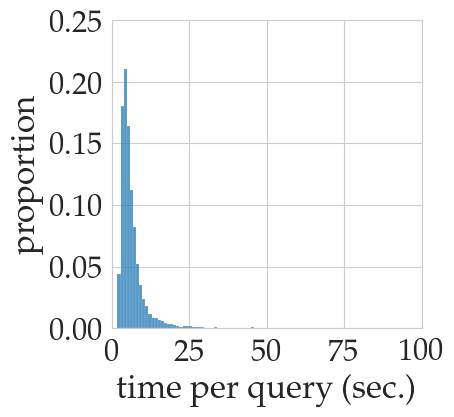

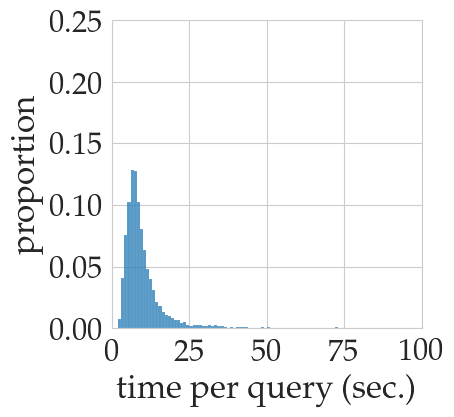

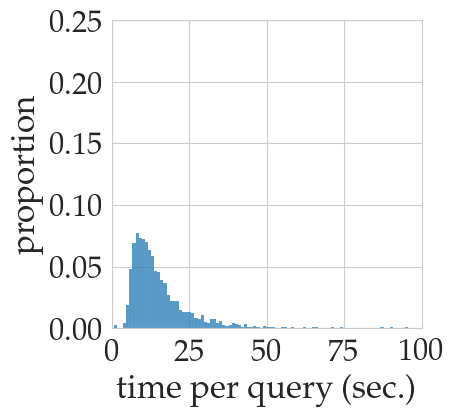

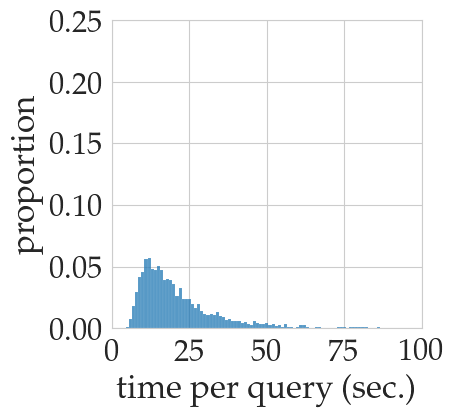

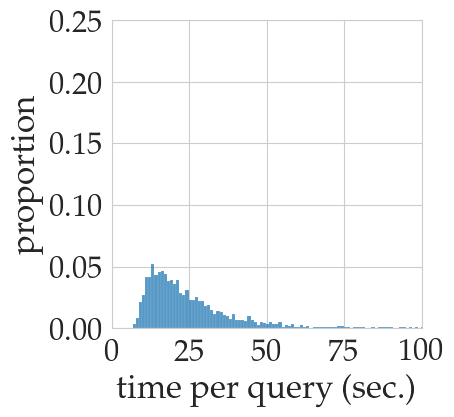

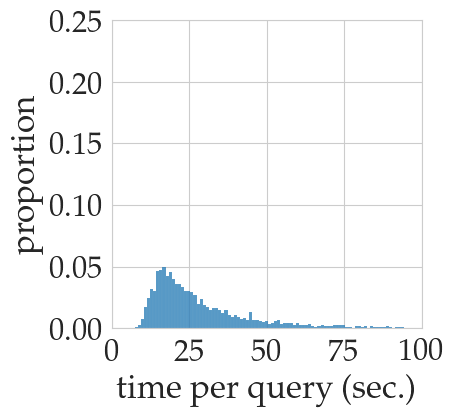

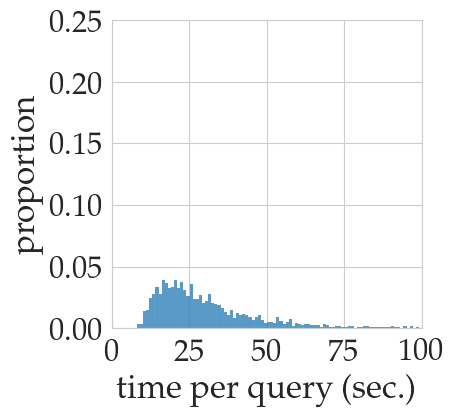

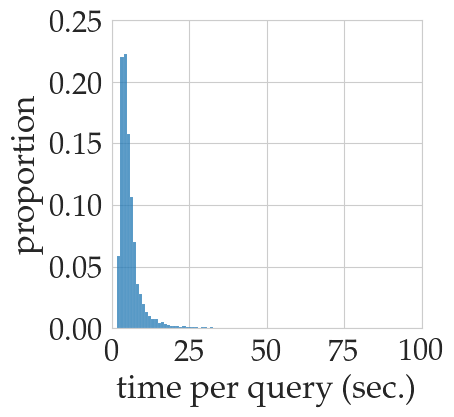

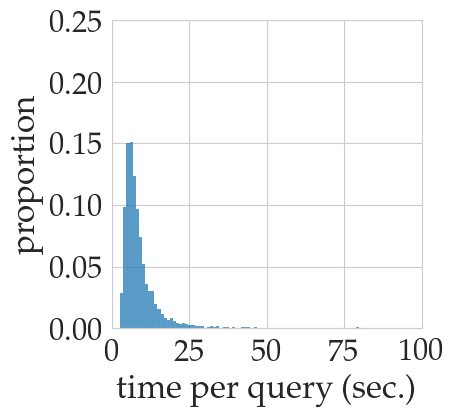

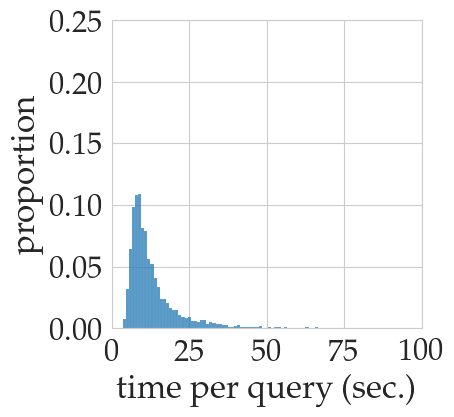

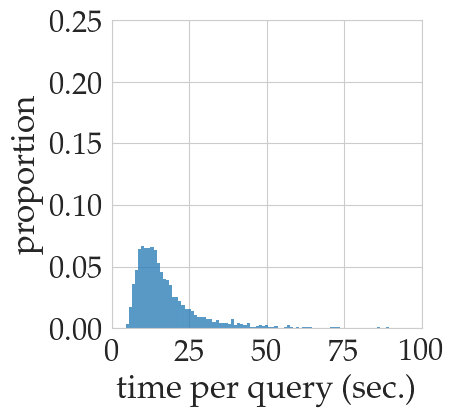

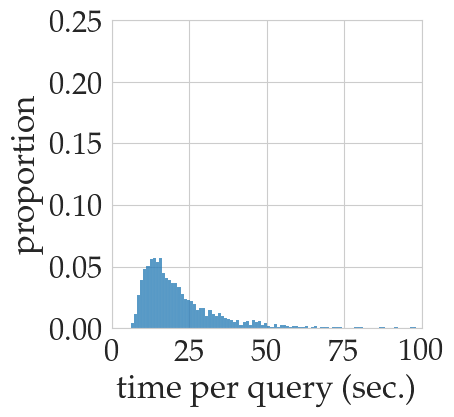

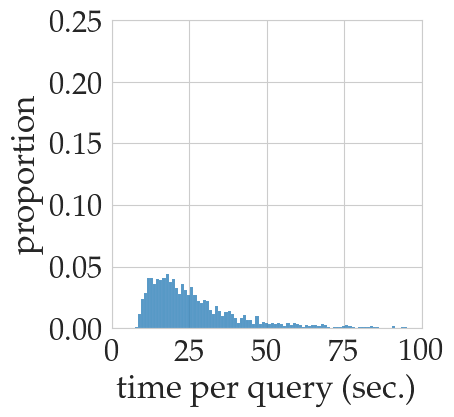

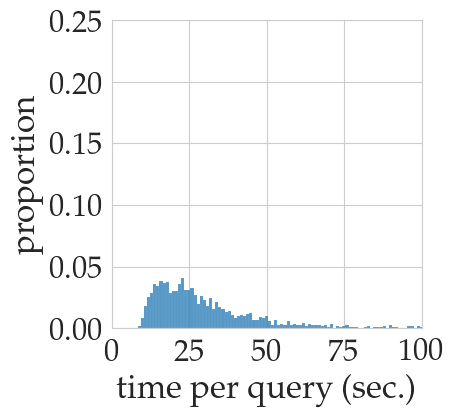

In [30]:
for name, df in zip(['dogs3', 'birds5'], [dogs3_df, birds5_df]):
    for i in range(7):
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        m = i + 2
        sns.histplot(
            data=df[df.num_images_per_question == m],
            x="time_per_question",
            ax=ax,
            binwidth=1, stat='proportion')
        # ax.set_yticks([0, 20, 40, 60, 80, 100])
        ax.set_ylim((0, 0.25))
        ax.set_xticks([0, 25, 50, 75, 100])
        ax.set_xlim((0, 100))
        ax.set_xlabel("time per query (sec.)", fontsize=label_size)
        ax.set_ylabel("proportion", fontsize=label_size)
        ax.tick_params(axis="both", which="major", labelsize=tick_size)
        fig.savefig(
            f"plots/time_per_query_{name}_histogram_m={m}.png",
            dpi=300,
            format="png",
            bbox_inches="tight")

In [3]:
df = birds5_df.groupby('num_images_per_question').mean()
df = df.rename(columns={'time_per_question': 'mean_time_per_question'})
df['median_time_per_question'] =  birds5_df.groupby('num_images_per_question').median()

In [4]:
df.to_csv('dogs3_mean_and_median.csv')

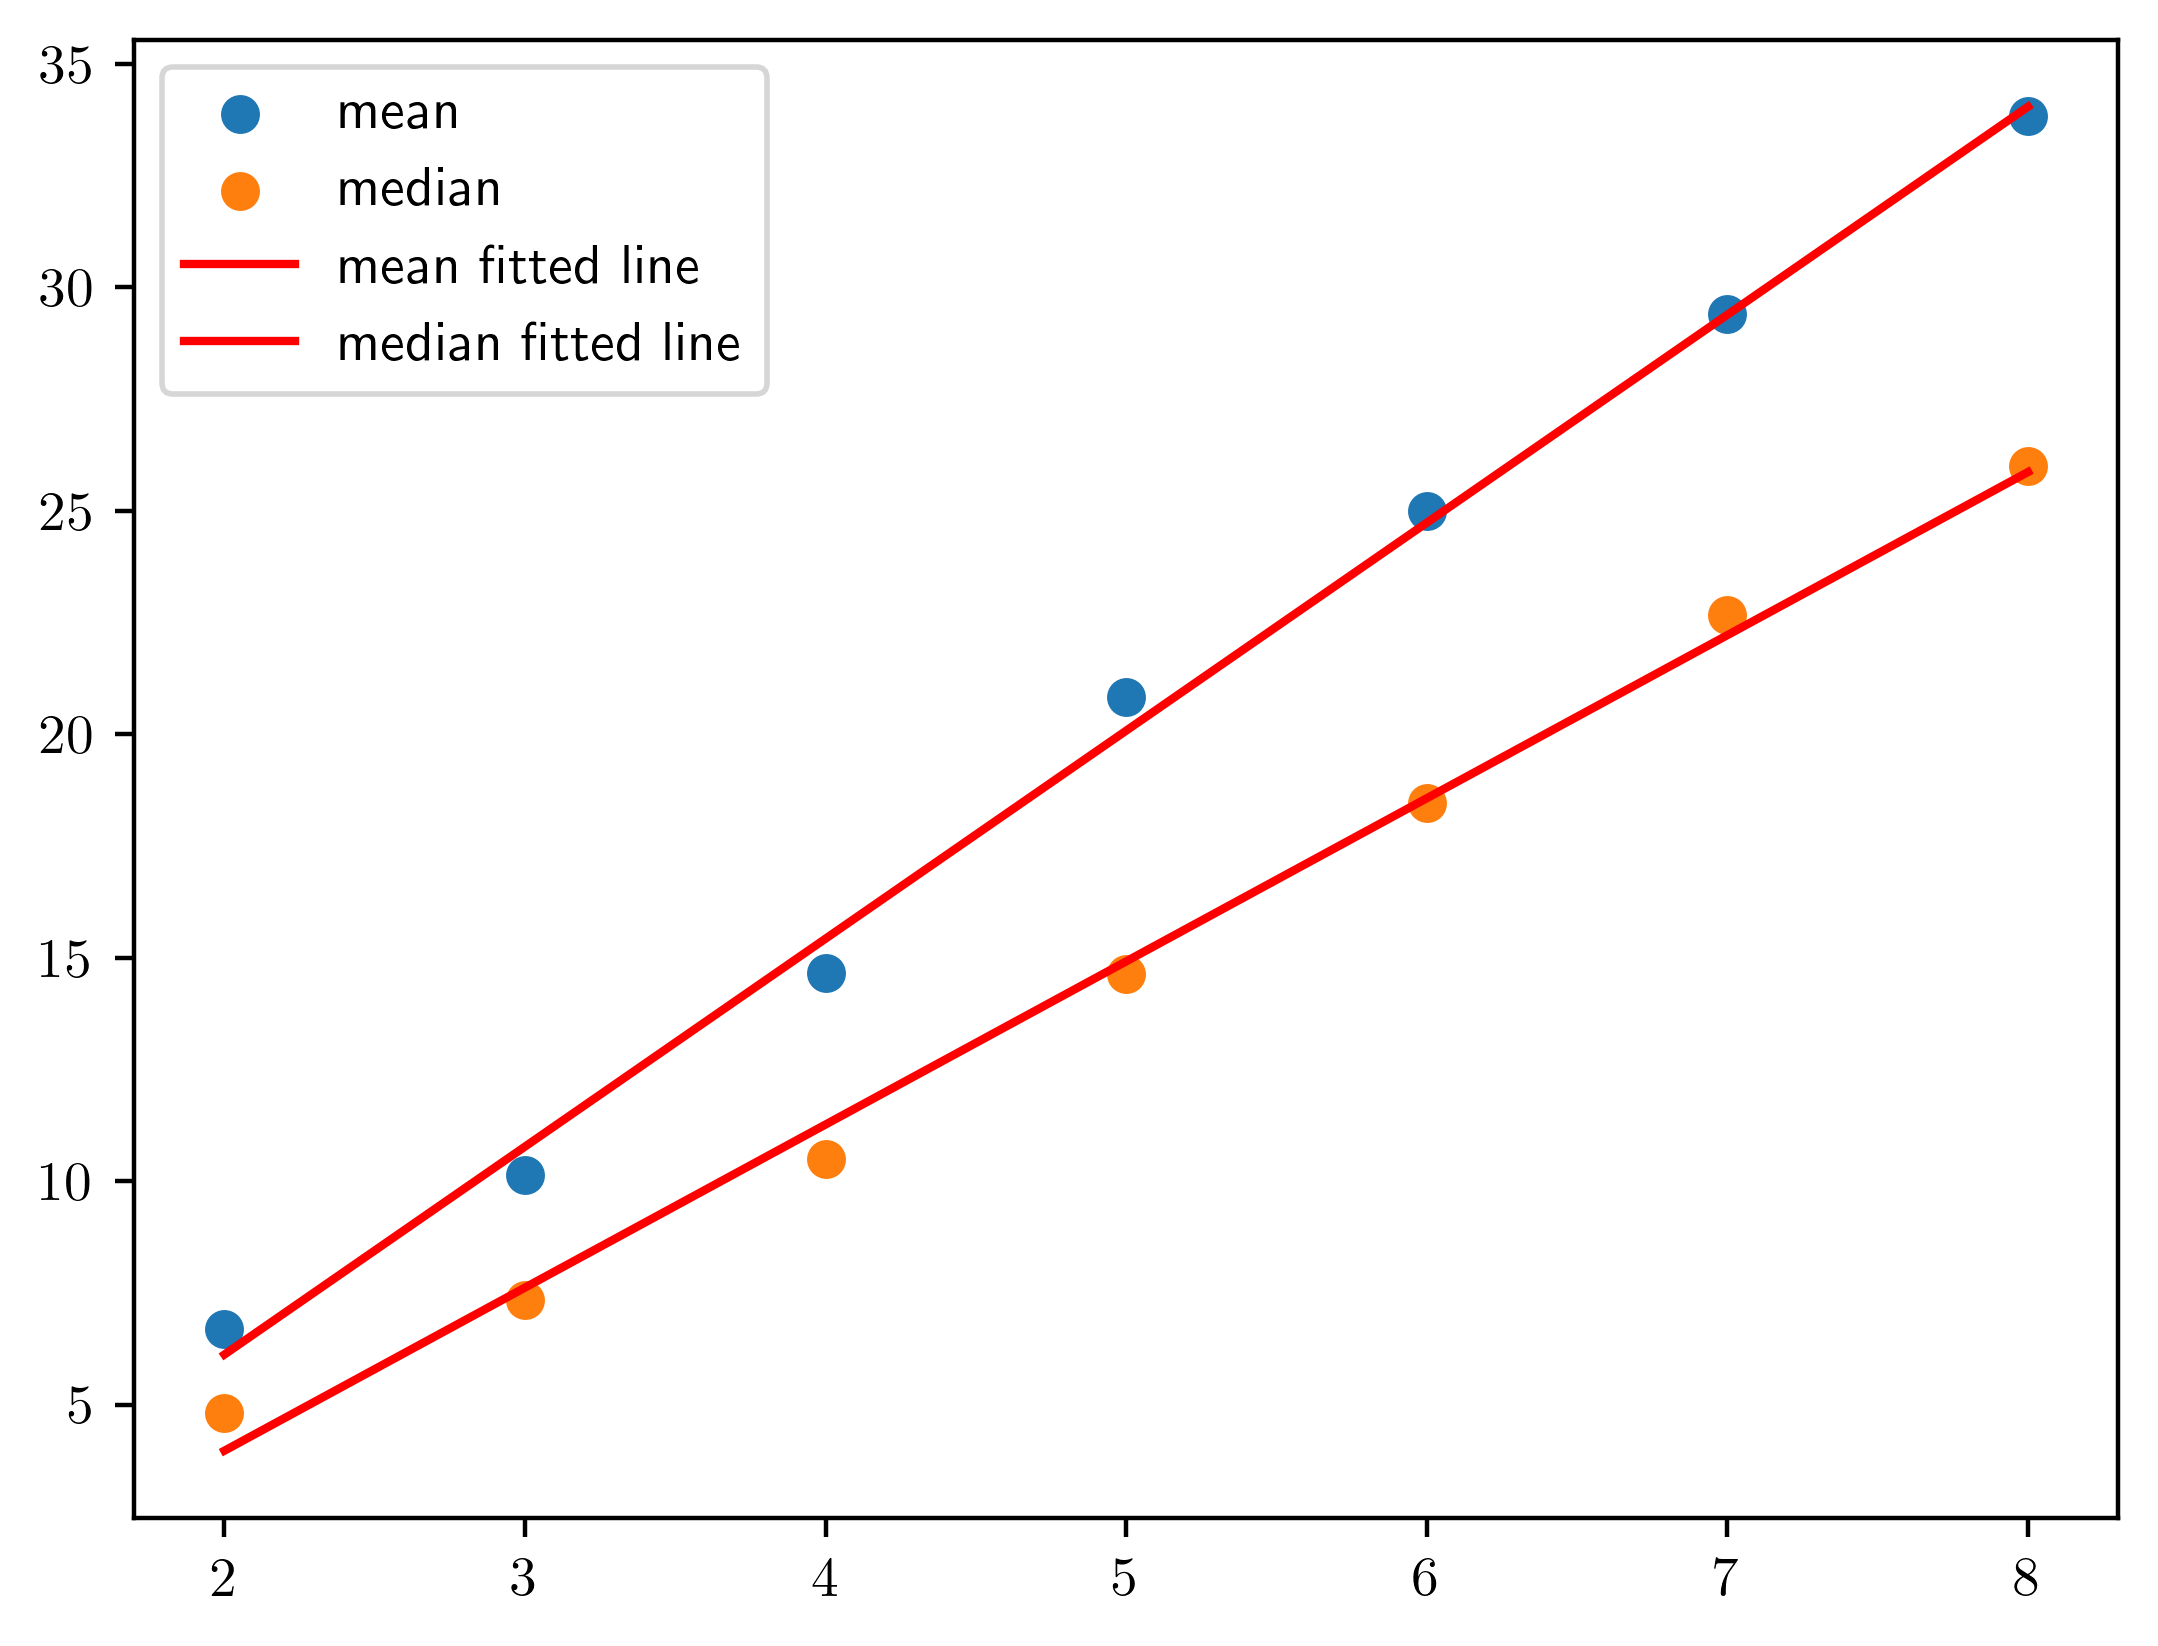

birds5 mean slope: 4.654
birds5 median slope: 3.650


In [96]:
fig, ax = plt.subplots(1, 1)

reg_mean = LinearRegression().fit(df.index.to_numpy().reshape(-1, 1), df.mean_time_per_question.to_numpy().reshape(-1, 1))
reg_median = LinearRegression().fit(df.index.to_numpy().reshape(-1, 1), df.median_time_per_question.to_numpy().reshape(-1, 1))

ax.scatter(df.index, df.mean_time_per_question, label='mean')
ax.scatter(df.index, df.median_time_per_question, label='median')

_x = np.arange(2, 9)
ax.plot(_x, reg_mean.predict(_x.reshape(-1, 1)).reshape(-1), c='r', label='mean fitted line')
ax.plot(_x, reg_median.predict(_x.reshape(-1, 1)).reshape(-1), c='r', label='median fitted line')

ax.legend()
plt.show()

print(f'birds5 mean slope: {reg_mean.coef_[0, 0]:.3f}')
print(f'birds5 median slope: {reg_median.coef_[0, 0]:.3f}')

In [6]:
dogs3_df.groupby('num_images_per_question').mean()

,time_per_question
num_images_per_question,
2,6.951559
3,10.827715
4,16.625545
5,22.641578
6,26.827531
7,31.801324
8,34.833175
